# Simulating an MA(q) Process

Let $\epsilon_t$ be some white noise with mean 0 and variance $\sigma^2$, then an MA(q) process is given by $x_t = \sum_0 ^q \beta_i \epsilon_{t-i}$

An example of this process is a coin toss. If you get a dollar for heads and lose a dollar for tails then your average earning from 4 tosses is given by: $1/4 \epsilon_t + 1/4 \epsilon_{t-1} + 1/4 \epsilon_{t-2} + 1/4 \epsilon_{t-1}$. Let's try to simulate this...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time = np.arange(0,100,1)
flips = np.random.randint(0, 2, size=100)
earning = np.where(flips==1, 1, -1)
sum_earning = []
for num in range(100+1):
    sum_earning.append(earning[:num].sum())
sum_earning = np.array(sum_earning)
print(sum_earning)
earning.sum()

[ 0  1  2  3  4  3  2  1  2  3  4  5  6  5  6  5  4  5  6  5  4  5  6  7
  6  7  8  9  8  7  6  5  6  7  8  9  8  9  8  9 10 11 10 11 10 11 10  9
 10 11 12 11 10 11 10 11 12 13 12 13 12 11 12 13 14 13 12 13 14 15 14 15
 16 17 16 17 16 17 18 19 18 19 18 17 16 15 14 13 12 11 10  9  8  9  8  7
  6  7  8  9 10]


10

Text(0, 0.5, 'Total Earnings')

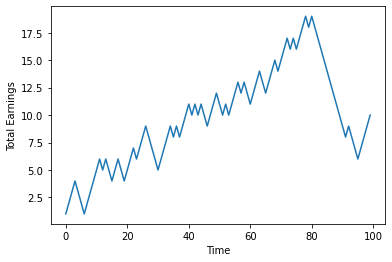

In [3]:
plt.plot(time,sum_earning[1:])
plt.xlabel("Time")
plt.ylabel("Total Earnings")

In [4]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(sum_earning)
print('h0: Random Walk')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

h0: Random Walk
ADF Statistic: -2.159143
p-value: 0.221407
	1%: -3.498
	5%: -2.891
	10%: -2.582
